In [1]:
import requests
import io
import pandas as pd



In [19]:
from pathlib import Path
import os
base_dir = r"D:\out\classes\CS526 data science\project\data"


dfs = []
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path):
        file_path = os.path.join(folder_path, "T_ONTIME_REPORTING.csv") 
        if os.path.exists(file_path):
            df = pd.read_csv(file_path,dtype={'CRS_DEP_TIME': str})
            df["source_folder"] = folder_name  
            dfs.append(df)
        else:
            print(f"⚠️ {file_path} not existing")


merged_df = pd.concat(dfs, ignore_index=True)
merged_df = merged_df[merged_df['ORIGIN_CITY_NAME'] == 'Raleigh/Durham, NC']
merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])
merged_df = merged_df.sort_values('FL_DATE')





C:\Users\ljq\AppData\Local\Temp\ipykernel_15364\1818386382.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])


In [20]:
merged_df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,CANCELLED,WEATHER_DELAY,source_folder
1159918,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Seattle, WA",WA,0710,705.0,-5.0,0.0,0.0,0.0,NaN,T_ONTIME_REPORTING_20251020_125620
1159896,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Chicago, IL",IL,0605,558.0,-7.0,0.0,0.0,0.0,NaN,T_ONTIME_REPORTING_20251020_125620
1159895,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Orlando, FL",FL,1640,NaN,NaN,NaN,NaN,1.0,NaN,T_ONTIME_REPORTING_20251020_125620
1159894,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Orlando, FL",FL,1355,1614.0,139.0,139.0,1.0,0.0,0.0,T_ONTIME_REPORTING_20251020_125620
1159893,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Orlando, FL",FL,1220,1302.0,42.0,42.0,1.0,0.0,0.0,T_ONTIME_REPORTING_20251020_125620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604420,2024,4,12,31,2024-12-31,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Dallas, TX",TX,1155,1206.0,11.0,11.0,0.0,0.0,NaN,T_ONTIME_REPORTING_20251020_125319
604419,2024,4,12,31,2024-12-31,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Charlotte, NC",NC,1810,1802.0,-8.0,0.0,0.0,0.0,0.0,T_ONTIME_REPORTING_20251020_125319
604418,2024,4,12,31,2024-12-31,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Charlotte, NC",NC,1620,1610.0,-10.0,0.0,0.0,0.0,NaN,T_ONTIME_REPORTING_20251020_125319
604448,2024,4,12,31,2024-12-31,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,"Washington, DC",VA,1450,1458.0,8.0,8.0,0.0,0.0,NaN,T_ONTIME_REPORTING_20251020_125319


In [ ]:
merged_df.to_csv("new_merged.csv", index=False)

In [21]:
weather = pd.read_csv("clean_weather_RDU_2022_2024.csv")
weather["DATE"] = pd.to_datetime(weather["DATE"])
weather = weather.sort_values("DATE")

In [22]:
flight=merged_df
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].astype(str).str.strip()
valid_mask = flight['CRS_DEP_TIME'].str.fullmatch(r'\d{4}', na=False)
invalid_rows = flight[~valid_mask]
invalid_count = len(invalid_rows)
invalid_ratio = invalid_count / len(flight) * 100
print(invalid_rows)
print(invalid_count)
print(invalid_ratio)

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, FL_DATE, ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DEL15, CANCELLED, WEATHER_DELAY, source_folder]
Index: []

[0 rows x 25 columns]
0
0.0


In [23]:
flight = flight[valid_mask].copy()
flight = flight.reset_index(drop=True)

In [24]:
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].astype(str).str.zfill(4)
flight['CRS_DEP_HOUR'] = flight['CRS_DEP_TIME'].str[:2].astype(int)
flight['CRS_DEP_MIN'] = flight['CRS_DEP_TIME'].str[2:].astype(int)
flight['CRS_DEP_DATETIME'] = flight.apply(
    lambda row: row['FL_DATE'] + pd.Timedelta(hours=row['CRS_DEP_HOUR'], minutes=row['CRS_DEP_MIN']),
    axis=1
)

In [25]:
flight = flight.sort_values('CRS_DEP_DATETIME')

In [28]:
merged = pd.merge_asof(
    flight,
    weather,
    left_on="CRS_DEP_DATETIME",
    right_on="DATE",
    direction="nearest",   
    tolerance=pd.Timedelta("1H")  
)
merged

C:\Users\ljq\AppData\Local\Temp\ipykernel_15364\1250268331.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta("1H")


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,DateTime,Airport
0,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,97.0,OVC:08 2.13,1011.4,16.093,220.0,NaN,4.1,2022-01-01 05:51:00,RDU
1,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,97.0,OVC:08 2.13,1011.4,16.093,220.0,NaN,4.1,2022-01-01 05:51:00,RDU
2,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,97.0,OVC:08 2.13,1011.4,16.093,220.0,NaN,4.1,2022-01-01 05:51:00,RDU
3,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,97.0,OVC:08 2.13,1011.4,16.093,220.0,NaN,4.1,2022-01-01 05:51:00,RDU
4,2022,1,1,1,2022-01-01,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,97.0,OVC:08 2.13,1011.4,16.093,220.0,NaN,4.1,2022-01-01 05:51:00,RDU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174776,2024,4,12,31,2024-12-31,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,83.0,FEW:02 8.84 FEW:02 13.72,1003.0,16.093,000,NaN,0,2024-12-31 19:51:00,RDU
174777,2024,4,12,31,2024-12-31,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,83.0,FEW:02 8.84 FEW:02 13.72,1003.0,16.093,000,NaN,0,2024-12-31 19:51:00,RDU
174778,2024,4,12,31,2024-12-31,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,83.0,FEW:02 8.84 FEW:02 13.72,1003.0,16.093,000,NaN,0,2024-12-31 19:51:00,RDU
174779,2024,4,12,31,2024-12-31,14492,1449202,34492,RDU,"Raleigh/Durham, NC",...,NaN,84.0,SCT:04 8.84 SCT:04 21.34 BKN:07 33.53,1002.5,16.093,190,NaN,2.6,2024-12-31 20:51:00,RDU


In [29]:
merged["time_diff_min"] = (merged["CRS_DEP_DATETIME"] - merged["DATE"]).abs().dt.total_seconds() / 60

In [30]:
merged.to_csv("new_data.csv", index=False)


In [31]:
df=merged[['WEATHER_DELAY','DEP_DELAY','DEP_DEL15','CANCELLED','CRS_DEP_DATETIME','HourlyAltimeterSetting','HourlyDewPointTemperature','HourlyDryBulbTemperature',
'HourlyPrecipitation','HourlyPresentWeatherType','HourlyPressureChange','HourlyPressureTendency','HourlyRelativeHumidity','HourlySkyConditions',
'HourlySeaLevelPressure','HourlyVisibility','HourlyWindDirection','HourlyWindGustSpeed','HourlyWindSpeed','time_diff_min']]
print(df)

        WEATHER_DELAY  DEP_DELAY  DEP_DEL15  CANCELLED    CRS_DEP_DATETIME  \
0                 0.0       64.0        1.0        0.0 2022-01-01 05:30:00   
1                 NaN       -8.0        0.0        0.0 2022-01-01 05:40:00   
2                 NaN       -7.0        0.0        0.0 2022-01-01 05:45:00   
3                 NaN       -3.0        0.0        0.0 2022-01-01 06:00:00   
4                 NaN       -7.0        0.0        0.0 2022-01-01 06:00:00   
...               ...        ...        ...        ...                 ...   
174776            NaN      -10.0        0.0        0.0 2024-12-31 19:45:00   
174777            NaN       -9.0        0.0        0.0 2024-12-31 19:47:00   
174778            NaN      -17.0        0.0        0.0 2024-12-31 20:10:00   
174779            NaN      -12.0        0.0        0.0 2024-12-31 20:26:00   
174780            NaN      -15.0        0.0        0.0 2024-12-31 21:57:00   

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
0 

In [32]:
nan_counts =df.isna().sum()
print(nan_counts)

WEATHER_DELAY                140278
DEP_DELAY                      3411
DEP_DEL15                      3411
CANCELLED                         0
CRS_DEP_DATETIME                  0
HourlyAltimeterSetting        24913
HourlyDewPointTemperature       179
HourlyDryBulbTemperature        172
HourlyPrecipitation           31500
HourlyPresentWeatherType     156841
HourlyPressureChange         114102
HourlyPressureTendency       114102
HourlyRelativeHumidity          179
HourlySkyConditions           15691
HourlySeaLevelPressure        10078
HourlyVisibility               9421
HourlyWindDirection           32484
HourlyWindGustSpeed          155854
HourlyWindSpeed                 237
time_diff_min                   172
dtype: int64


In [33]:
df=df[df['CANCELLED'] != 1]
df=df.drop(columns=['CANCELLED'])

In [35]:
df=df.dropna(subset=['WEATHER_DELAY'])
print(df)

        WEATHER_DELAY  DEP_DELAY  DEP_DEL15    CRS_DEP_DATETIME  \
0                 0.0       64.0        1.0 2022-01-01 05:30:00   
10                0.0      228.0        1.0 2022-01-01 06:05:00   
28                0.0      196.0        1.0 2022-01-01 07:46:00   
30                0.0       98.0        1.0 2022-01-01 08:10:00   
32                0.0       61.0        1.0 2022-01-01 08:31:00   
...               ...        ...        ...                 ...   
174743            0.0      129.0        1.0 2024-12-31 14:51:00   
174748            0.0       -5.0        0.0 2024-12-31 15:36:00   
174766            0.0       -8.0        0.0 2024-12-31 18:10:00   
174769            0.0       93.0        1.0 2024-12-31 18:34:00   
174770            0.0       19.0        1.0 2024-12-31 18:40:00   

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
0                       1011.9                       18.9   
10                      1011.9                       18.9   
28          

In [40]:
w=df[df['WEATHER_DELAY']>0]
w

,WEATHER_DELAY,DEP_DELAY,DEP_DEL15,CRS_DEP_DATETIME,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,time_diff_min
86,2.0,30.0,1.0,2022-01-01 17:12:00,1007.5,17.8,23.9,0.0,NaN,NaN,NaN,69.0,SCT:04 13.72 BKN:07 33.53 BKN:07 76.2,1007.2,16.093,220.0,12.9,6.7,21.0
266,41.0,57.0,1.0,2022-01-03 05:30:00,1003.7,6.7,7.2,4.0,TS +RA:02 BR:1 |TS RA BR |RA,NaN,NaN,97.0,BKN:07 1.83 OVC:08 3.66,NaN,4.828,30.0,16.0,11.3,1.0
268,16.0,66.0,1.0,2022-01-03 05:45:00,1002.7,6.7,6.7,8.6,TS +RA:02 BR:1 |TS RA BR |RA,NaN,NaN,100.0,BKN:07 2.44 BKN:07 3.96 OVC:08 7.32,NaN,3.219,30.0,17.0,8.2,6.0
272,42.0,42.0,1.0,2022-01-03 06:00:00,1002.7,6.7,6.7,7.3,TS +RA:02 BR:1 |TS RA BR |RA,NaN,NaN,100.0,BKN:07 2.44 OVC:08 3.35,NaN,2.414,40.0,17.5,11.8,3.0
273,22.0,22.0,1.0,2022-01-03 06:00:00,1002.7,6.7,6.7,7.3,TS +RA:02 BR:1 |TS RA BR |RA,NaN,NaN,100.0,BKN:07 2.44 OVC:08 3.35,NaN,2.414,40.0,17.5,11.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174389,20.0,60.0,1.0,2024-12-29 11:14:00,1015.2,13.9,20.6,0.0,NaN,NaN,NaN,66.0,SCT:04 18.29 BKN:07 45.72,1014.9,16.093,160,14.4,9.3,23.0
174411,6.0,31.0,1.0,2024-12-29 12:49:00,1013.9,13.3,18.9,T,-RA:02 |RA |RA,-3.2,5.0,70.0,SCT:04 9.45 BKN:07 12.19 OVC:08 14.94,1013.5,12.875,240,13.9,7.7,2.0
174422,7.0,26.0,1.0,2024-12-29 14:54:00,1010.8,13.9,16.7,0.3,-RA:02 |RA |RA,NaN,NaN,84.0,SCT:04 22.86 OVC:08 27.43,1010.6,16.093,150,NaN,4.1,3.0
174434,8.0,106.0,1.0,2024-12-29 16:12:00,NaN,13.9,15.6,NaN,||RA,-4.4,8.0,90.0,NaN,1009.1,14.0,140,NaN,5.7,12.0


In [41]:
w['WEATHER_DELAY'].mean()

np.float64(60.13060686015831)

In [42]:
df_copy=df.copy()
df_copy

,WEATHER_DELAY,DEP_DELAY,DEP_DEL15,CRS_DEP_DATETIME,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,time_diff_min
0,0.0,64.0,1.0,2022-01-01 05:30:00,1011.9,18.9,19.4,0.0,NaN,NaN,NaN,97.0,OVC:08 2.13,1011.4,16.093,220.0,NaN,4.1,21.0
10,0.0,228.0,1.0,2022-01-01 06:05:00,1011.9,18.9,19.4,0.0,NaN,NaN,NaN,97.0,OVC:08 2.13,1011.4,16.093,220.0,NaN,4.1,14.0
28,0.0,196.0,1.0,2022-01-01 07:46:00,1011.9,20.0,20.0,0.0,NaN,NaN,NaN,100.0,OVC:08 2.44,1011.4,11.265,230.0,NaN,3.6,5.0
30,0.0,98.0,1.0,2022-01-01 08:10:00,1011.9,20.0,20.0,0.0,NaN,NaN,NaN,100.0,OVC:08 2.44,1011.4,11.265,230.0,NaN,3.6,19.0
32,0.0,61.0,1.0,2022-01-01 08:31:00,1012.5,20.0,20.6,0.0,NaN,NaN,NaN,96.0,BKN:07 3.05 OVC:08 5.18,1012.2,12.875,220.0,NaN,6.2,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174743,0.0,129.0,1.0,2024-12-31 14:51:00,1003.7,11.1,18.9,0.0,NaN,NaN,NaN,61.0,BKN:07 9.45 BKN:07 16.76,1003.5,16.093,200,10.8,6.7,0.0
174748,0.0,-5.0,0.0,2024-12-31 15:36:00,1003.7,11.1,18.3,NaN,NaN,NaN,NaN,63.0,BKN:07 8.84 OVC:08 16.76,NaN,16.093,210,10.8,7.7,6.0
174766,0.0,-8.0,0.0,2024-12-31 18:10:00,1003.7,11.7,16.7,NaN,NaN,NaN,NaN,73.0,BKN:07 8.84 BKN:07 13.72,NaN,16.093,230,NaN,3.6,13.0
174769,0.0,93.0,1.0,2024-12-31 18:34:00,1003.4,11.1,15.6,NaN,NaN,NaN,NaN,75.0,SCT:04 8.84 SCT:04 13.72,NaN,16.093,220,NaN,3.1,10.0


In [47]:
cloud_types = ["OVC", "BKN", "SCT", "CLR"]
import re
def count_cloud_types(s):
    if pd.isna(s):
        return pd.Series({c: 0 for c in cloud_types})
    counts = {}
    for c in cloud_types:
        counts[c] = len(re.findall(r'\b{}\b'.format(c), str(s)))
    return pd.Series(counts)
df=df_copy
cloud_counts = df["HourlySkyConditions"].apply(count_cloud_types)
df = pd.concat([df, cloud_counts], axis=1)

# Weather type encoding
weather_types = ["RA", "SN", "DZ", "FZRA", "PL", "TS", "FG", "BR"]

def encode_weather(s):
    if pd.isna(s):
        return pd.Series({w: 0 for w in weather_types})
    s = str(s).upper()
    result = {}
    for w in weather_types:
        result[w] = 0
        matches = re.findall(r'([+-]?){0}(:\d+)?'.format(w), s)
        if matches:
            for m in matches:
                prefix = m[0]
                if prefix == '+':
                    val = 1
                elif prefix == '-':
                    val = -1
                else:
                    val = 0
                result[w] = max(result[w], val)
    return pd.Series(result)

weather_encoded = df["HourlyPresentWeatherType"].apply(encode_weather)
df = pd.concat([df, weather_encoded], axis=1)

# Handle precipitation (convert 'T' to 0)
df["HourlyPrecipitation"] = df["HourlyPrecipitation"].replace("T", 0).astype(float)

# Prepare features and target for regression
print("Preparing features for regression...")

# Select features for regression
feature_columns = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 
                  'HourlyDryBulbTemperature', 'HourlyPrecipitation',
                  'HourlyPressureChange', 'HourlyPressureTendency',
                  'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 
                  'HourlyVisibility', 'HourlyWindGustSpeed', 'HourlyWindSpeed',
                  ]+cloud_types +weather_types

# Remove rows with missing values in selected features
df_reg = df[['WEATHER_DELAY'] + feature_columns ].copy()
df_reg = df_reg.dropna()

Preparing features for regression...


In [48]:
df_reg

,WEATHER_DELAY,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyVisibility,...,SCT,CLR,RA,SN,DZ,FZRA,PL,TS,FG,BR
55,0.0,1009.8,18.3,24.4,0.0,-2.4,8.0,69.0,1009.5,16.093,...,0,0,0,0,0,0,0,0,0,0
57,0.0,1009.8,18.3,24.4,0.0,-2.4,8.0,69.0,1009.5,16.093,...,0,0,0,0,0,0,0,0,0,0
79,0.0,1007.8,17.2,25.0,0.0,-2.1,6.0,62.0,1007.3,16.093,...,1,0,0,0,0,0,0,0,0,0
286,75.0,1001.0,6.1,6.1,12.2,-2.2,8.0,100.0,1000.9,3.219,...,0,0,0,0,0,0,0,0,0,0
287,22.0,1001.0,6.1,6.1,12.2,-2.2,8.0,100.0,1000.9,3.219,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174410,0.0,1013.9,13.3,18.9,0.0,-3.2,5.0,70.0,1013.5,12.875,...,1,0,0,0,0,0,0,0,0,0
174411,6.0,1013.9,13.3,18.9,0.0,-3.2,5.0,70.0,1013.5,12.875,...,1,0,0,0,0,0,0,0,0,0
174486,0.0,1009.5,13.3,15.6,0.0,0.1,3.0,86.0,1009.3,16.093,...,0,0,0,0,0,0,0,0,0,0
174576,0.0,1011.2,6.1,17.8,0.0,-1.0,8.0,46.0,1010.7,16.093,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X = df_reg[feature_columns]
y = df_reg['WEATHER_DELAY']  # Target variable: flight delay time

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (944, 23)
Target shape: (944,)


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import f_regression
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import re
import warnings


Step 3: Data Normalization and Complete Univariate Analysis
1. Data Normalization
Data normalization completed

2. Complete Univariate Analysis - All Input Variables
2.1 Statistical Summary of All Input Variables

Statistical Summary of All Normalized Input Variables:
       HourlyAltimeterSetting  HourlyDewPointTemperature  \
count                944.0000                   944.0000   
mean                   0.0000                    -0.0000   
std                    1.0005                     1.0005   
min                   -3.1455                    -2.8822   
25%                   -0.6529                    -0.7674   
50%                    0.0243                     0.2283   
75%                    0.7591                     0.8068   
max                    4.0873                     1.6034   

       HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
count                  944.0000             944.0000              944.0000   
mean                     0.0000  

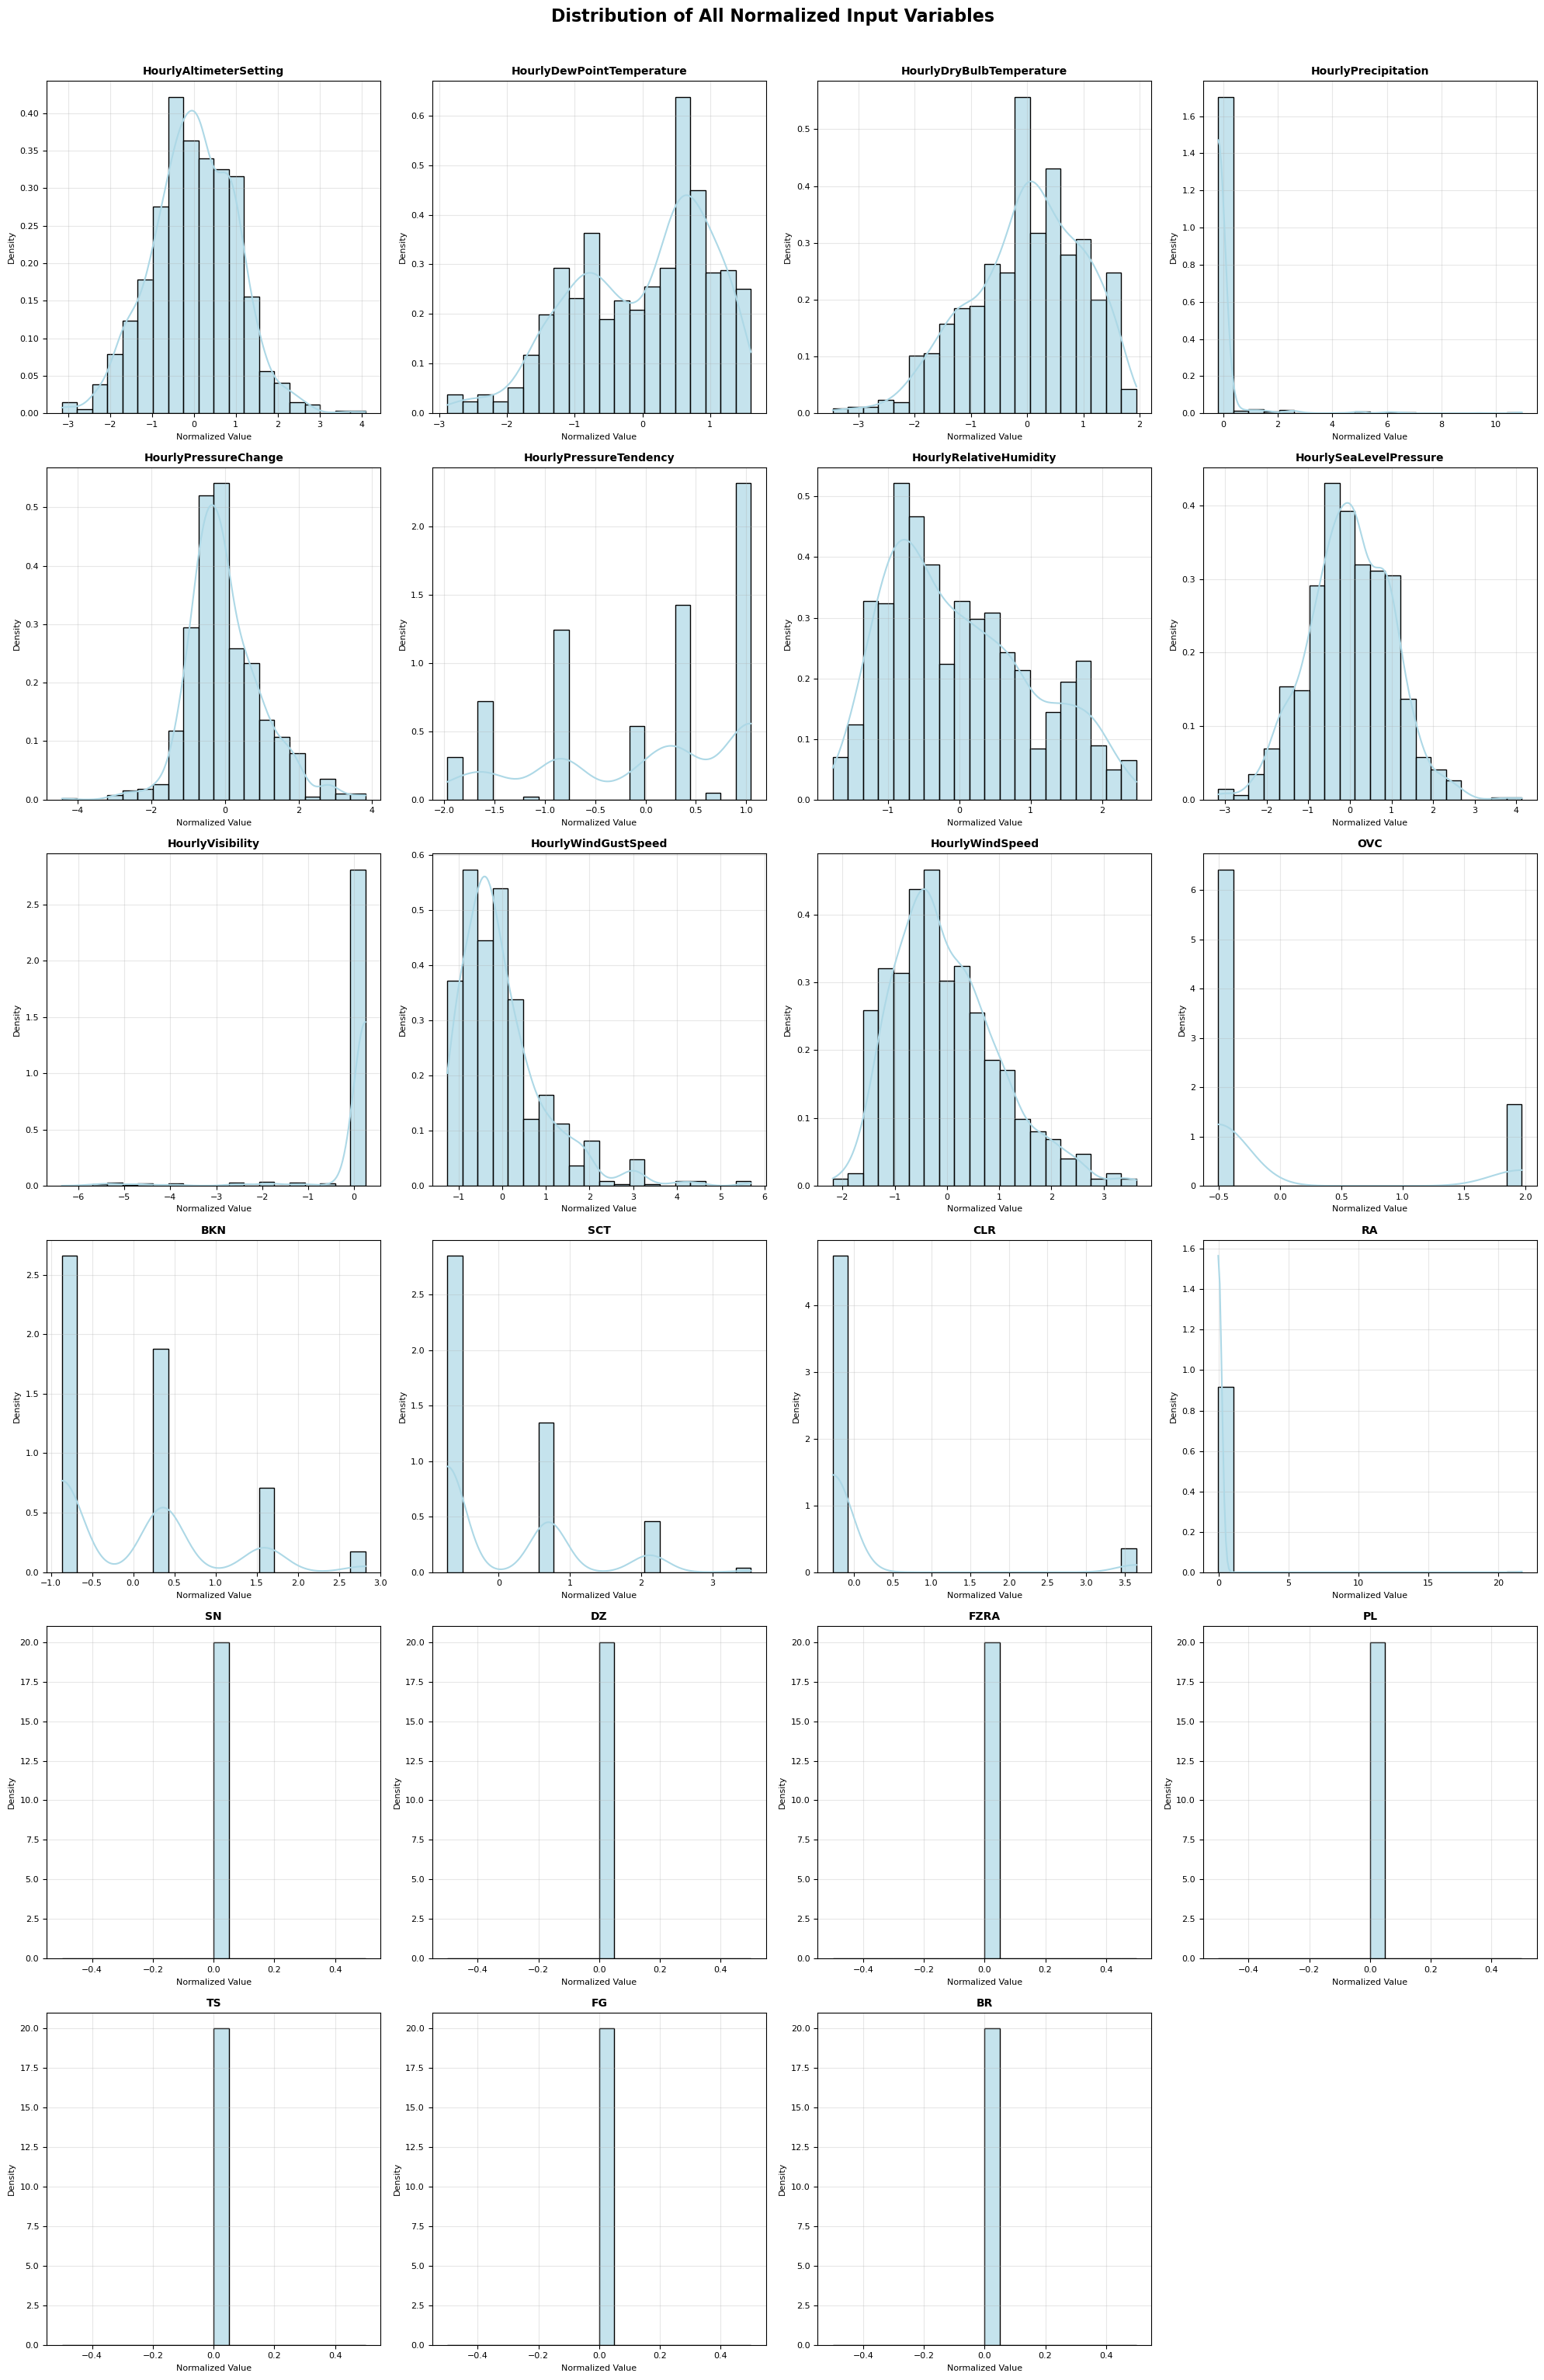


2.3 Box Plots for All Variables - Outlier Detection


C:\Users\ljq\AppData\Local\Temp\ipykernel_15364\3640138627.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(box_data, labels=feature_columns, patch_artist=True)


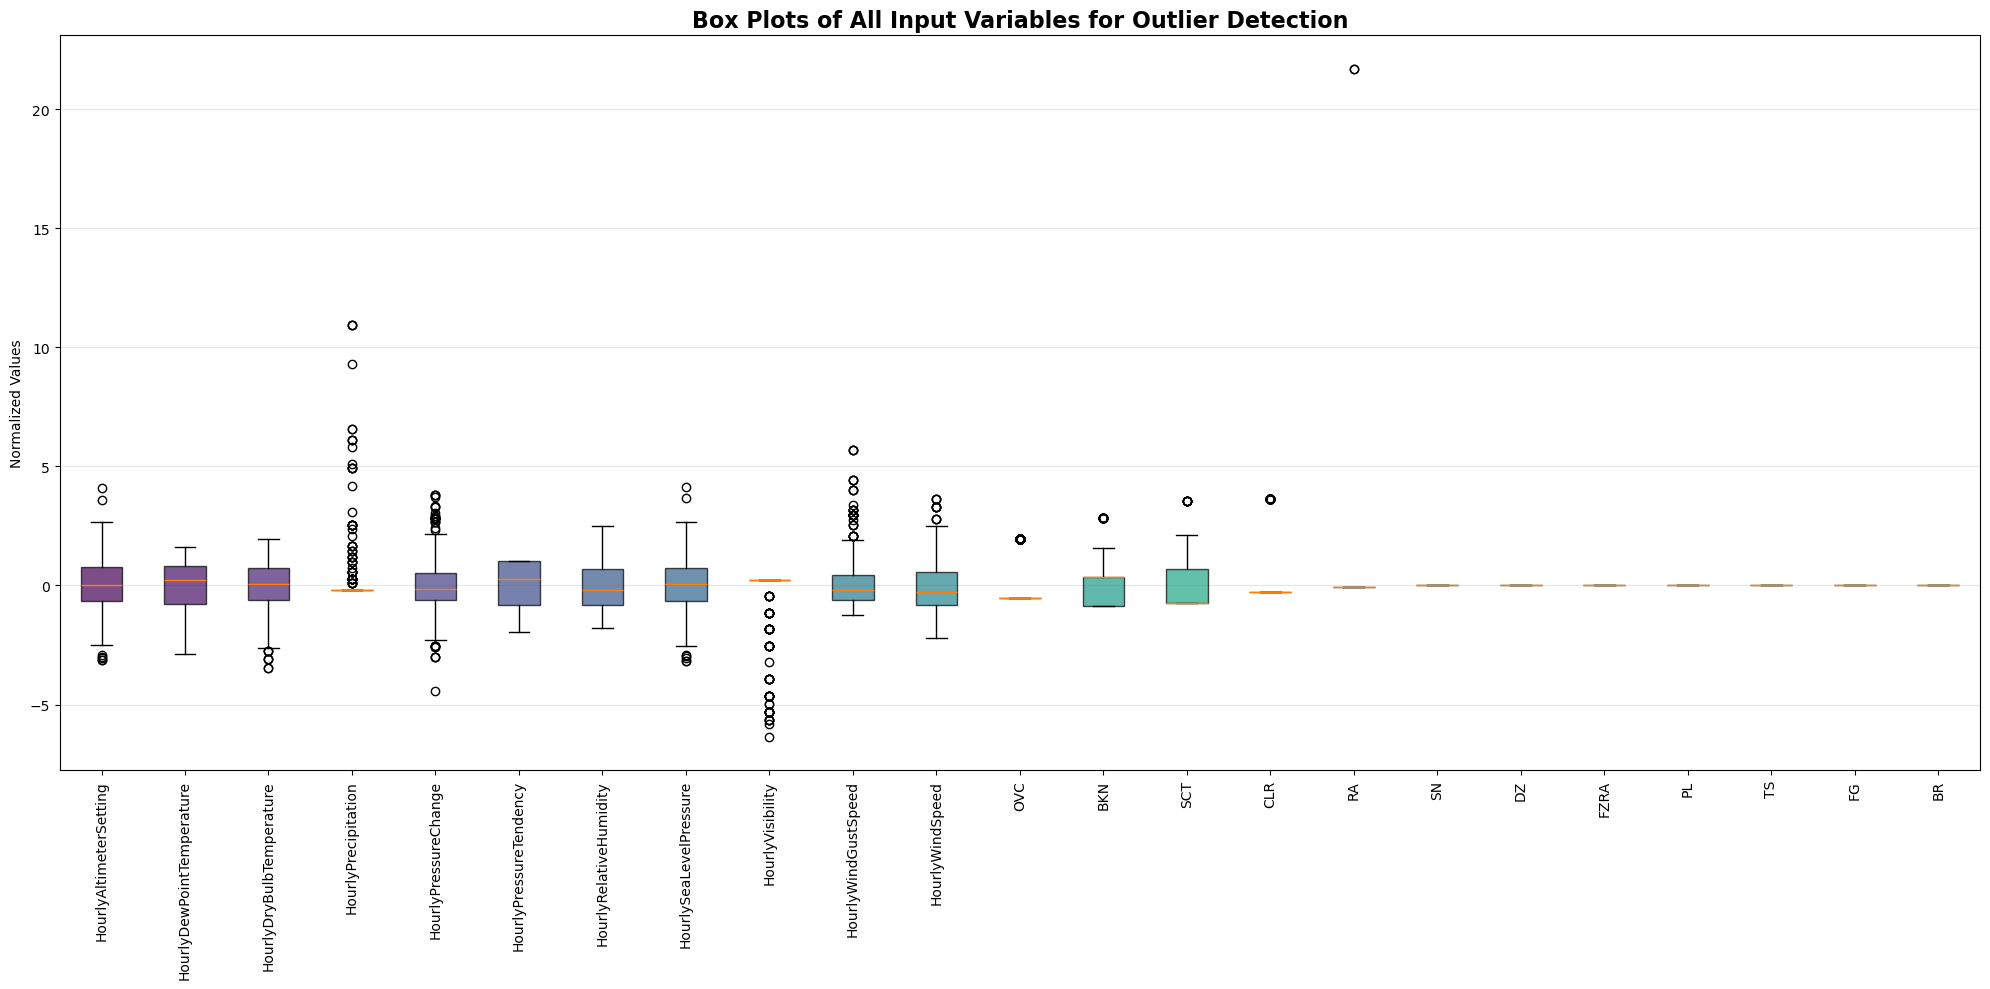

In [52]:
print("\nStep 3: Data Normalization and Complete Univariate Analysis")

# Data Normalization
print("1. Data Normalization")
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=feature_columns, index=X.index)
print("Data normalization completed")

# Create comprehensive univariate analysis
print("\n2. Complete Univariate Analysis - All Input Variables")

# 2.1 Statistical summary of all variables
print("2.1 Statistical Summary of All Input Variables")
stat_summary_all = X_normalized_df.describe()
print("\nStatistical Summary of All Normalized Input Variables:")
print(stat_summary_all.round(4))

# 2.2 Distribution histograms for all variables
print("\n2.2 Distribution Histograms for All Variables")

# Create multiple subplots to display distributions of all variables
n_features = len(feature_columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(feature_columns):
    ax = axes[i]
    
    # Create histogram with density curve
    sns.histplot(X_normalized_df[feature], kde=True, stat="density", bins=20, ax=ax, 
                 color='lightblue', alpha=0.7, edgecolor='black')
    
    ax.set_title(f'{feature}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Normalized Value', fontsize=8)
    ax.set_ylabel('Density', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide excess subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Distribution of All Normalized Input Variables', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 2.3 Box plots for all variables (outlier detection)
print("\n2.3 Box Plots for All Variables - Outlier Detection")

plt.figure(figsize=(20, 10))
box_data = [X_normalized_df[feature] for feature in feature_columns]

# Create box plots
box_plot = plt.boxplot(box_data, labels=feature_columns, patch_artist=True)

# Color the box plots
colors = plt.cm.viridis(np.linspace(0, 1, len(box_data)))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Box Plots of All Input Variables for Outlier Detection', 
          fontsize=16, fontweight='bold')
plt.ylabel('Normalized Values')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Step 4: Complete Multivariate Analysis and Correlation Analysis
4.1 Creating Complete Pairwise Relationships with All Variables
Creating PairGrid visualization with all variables...


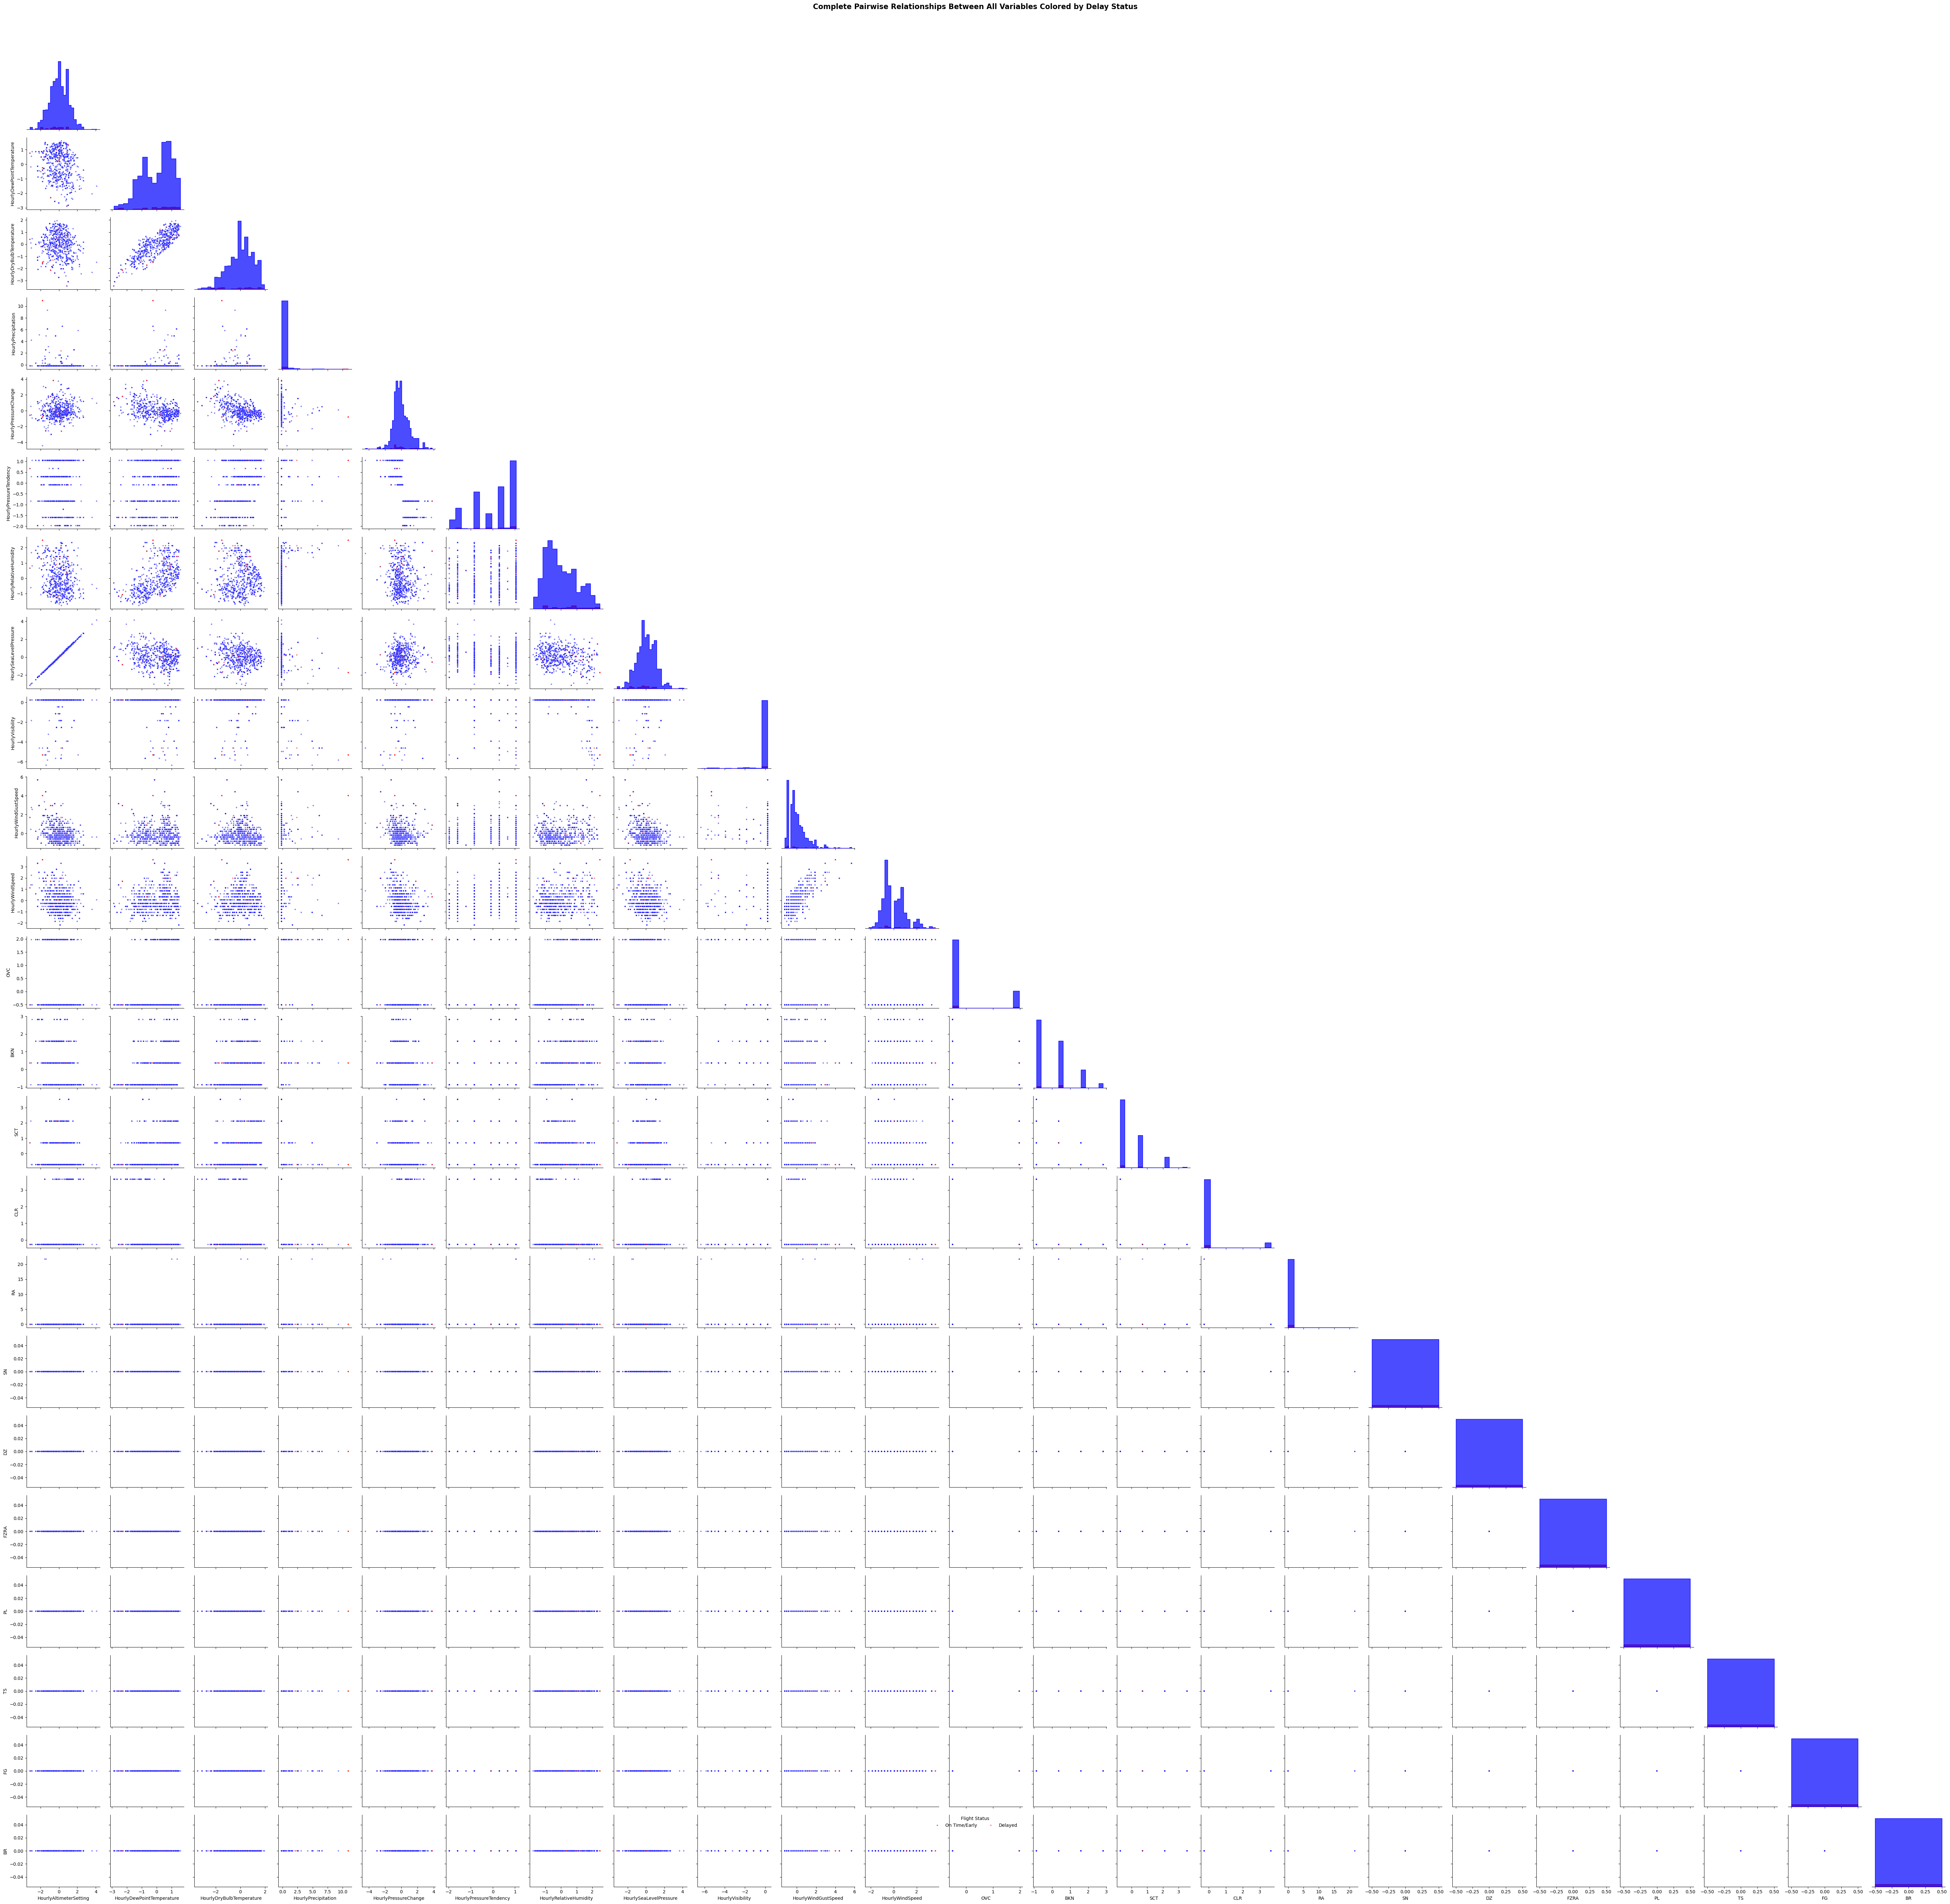


4.2 Creating Complete Correlation Heatmap with All Variables


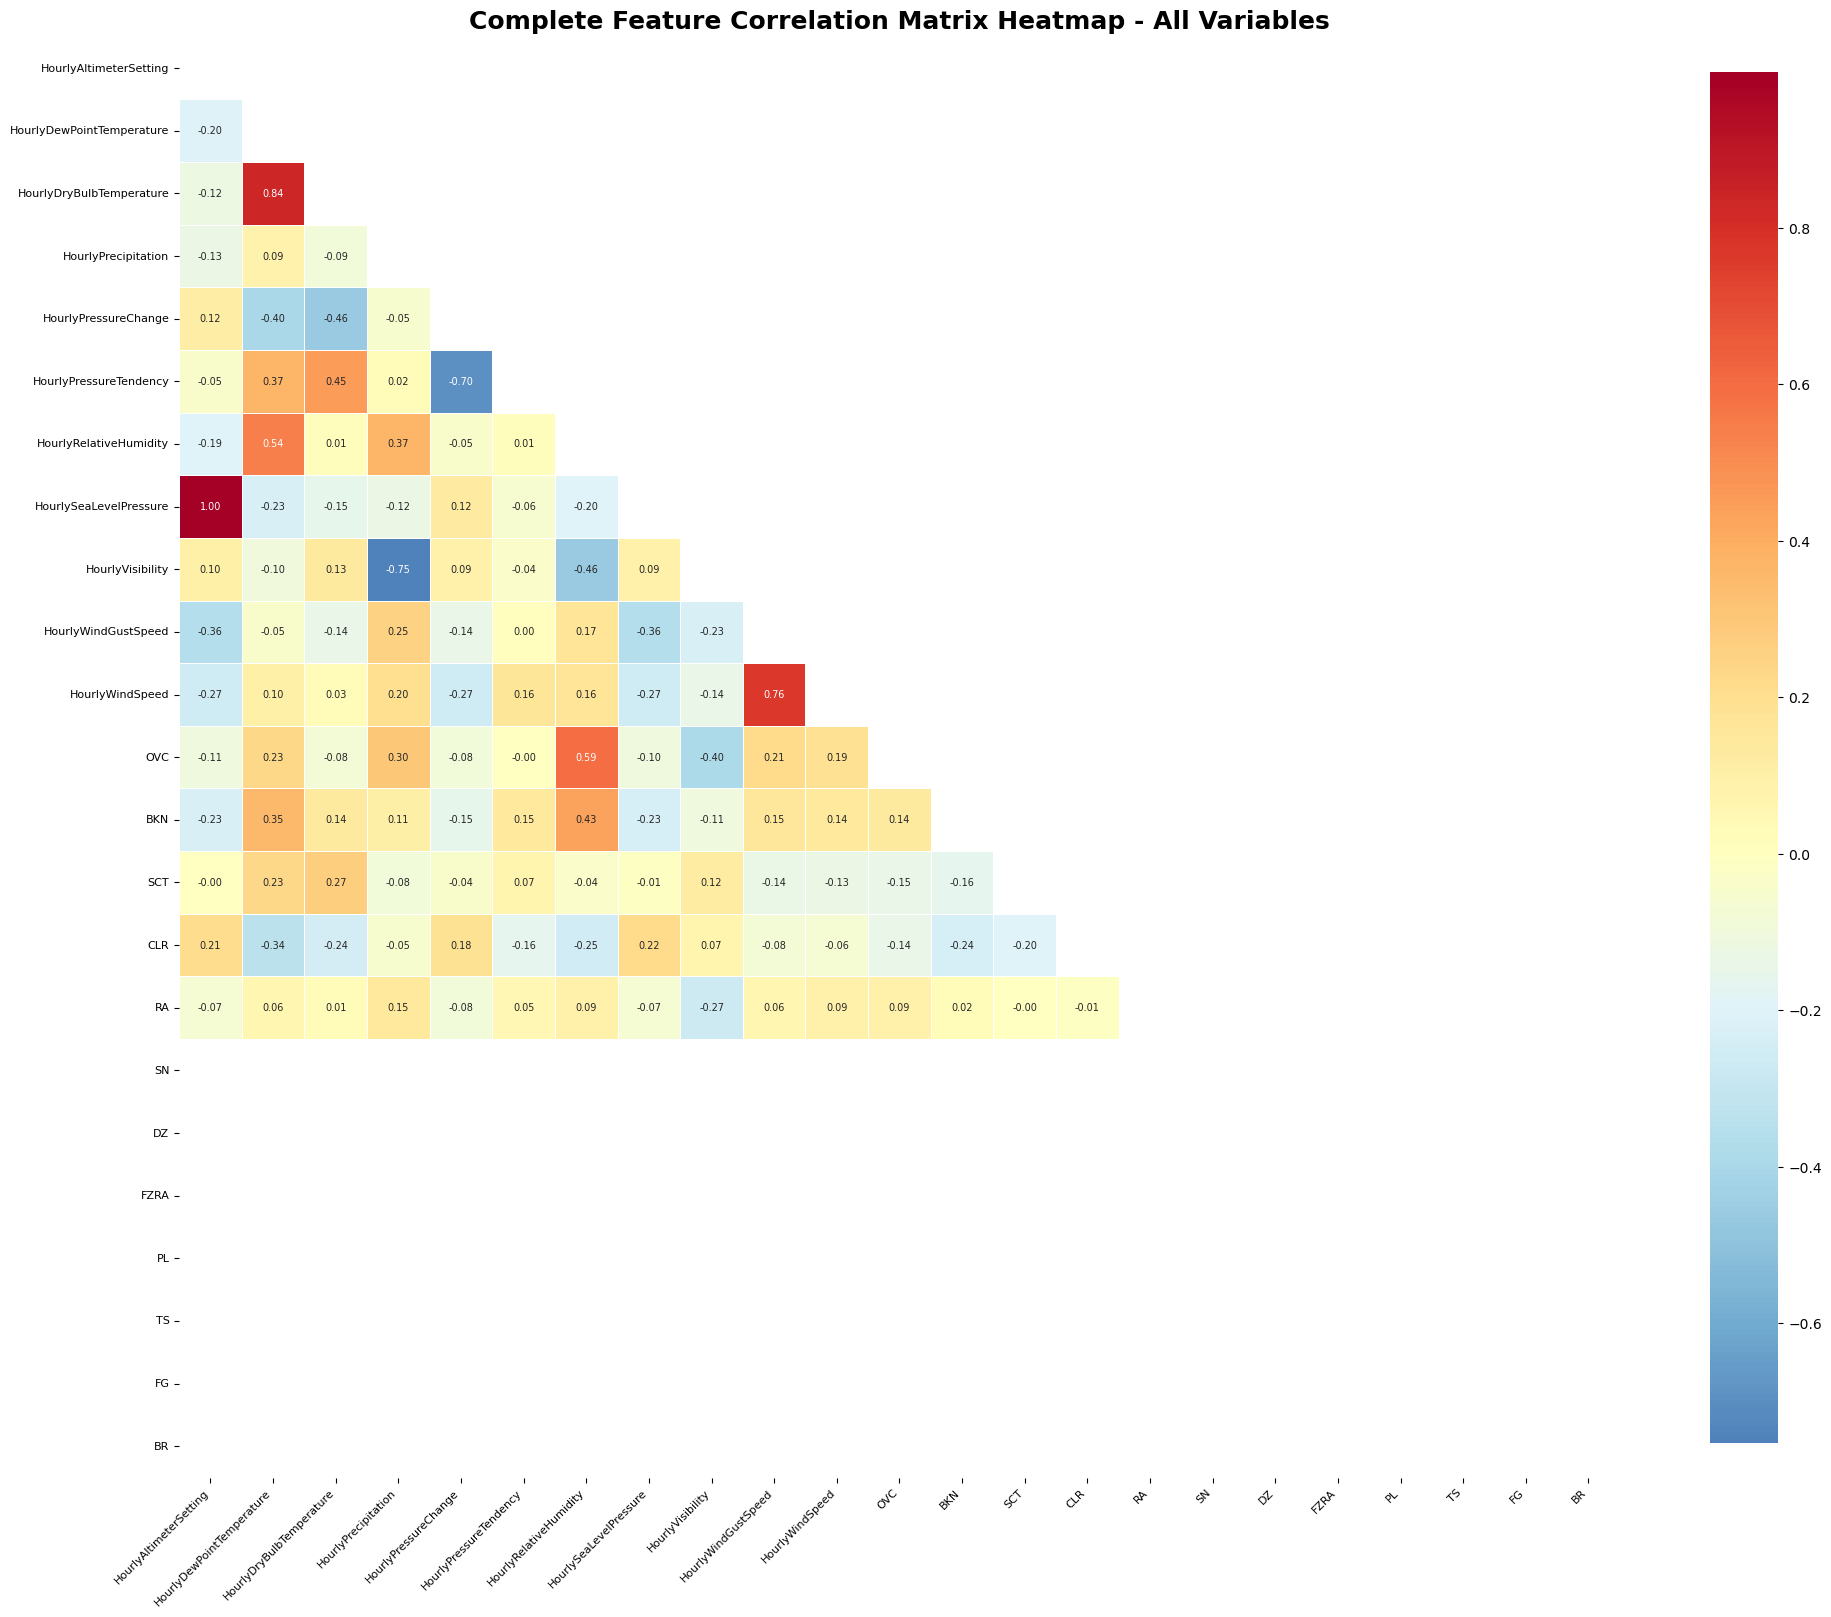


4.3 Complete Correlation Analysis with Flight Delay
Complete correlation of all features with flight delay (sorted by correlation):
 1. HourlyPrecipitation           : 0.0310
 2. SCT                           : 0.0303
 3. HourlyWindSpeed               : 0.0212
 4. HourlyWindGustSpeed           : 0.0207
 5. HourlyDryBulbTemperature      : 0.0124
 6. HourlyPressureChange          : 0.0095
 7. HourlyDewPointTemperature     : 0.0004
 8. RA                            : -0.0036
 9. HourlyRelativeHumidity        : -0.0065
10. HourlyPressureTendency        : -0.0074
11. OVC                           : -0.0145
12. HourlyVisibility              : -0.0162
13. CLR                           : -0.0208
14. BKN                           : -0.0258
15. HourlyAltimeterSetting        : -0.0288
16. HourlySeaLevelPressure        : -0.0296
17. SN                            : nan
18. DZ                            : nan
19. FZRA                          : nan
20. PL                            : nan
21. TS    

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


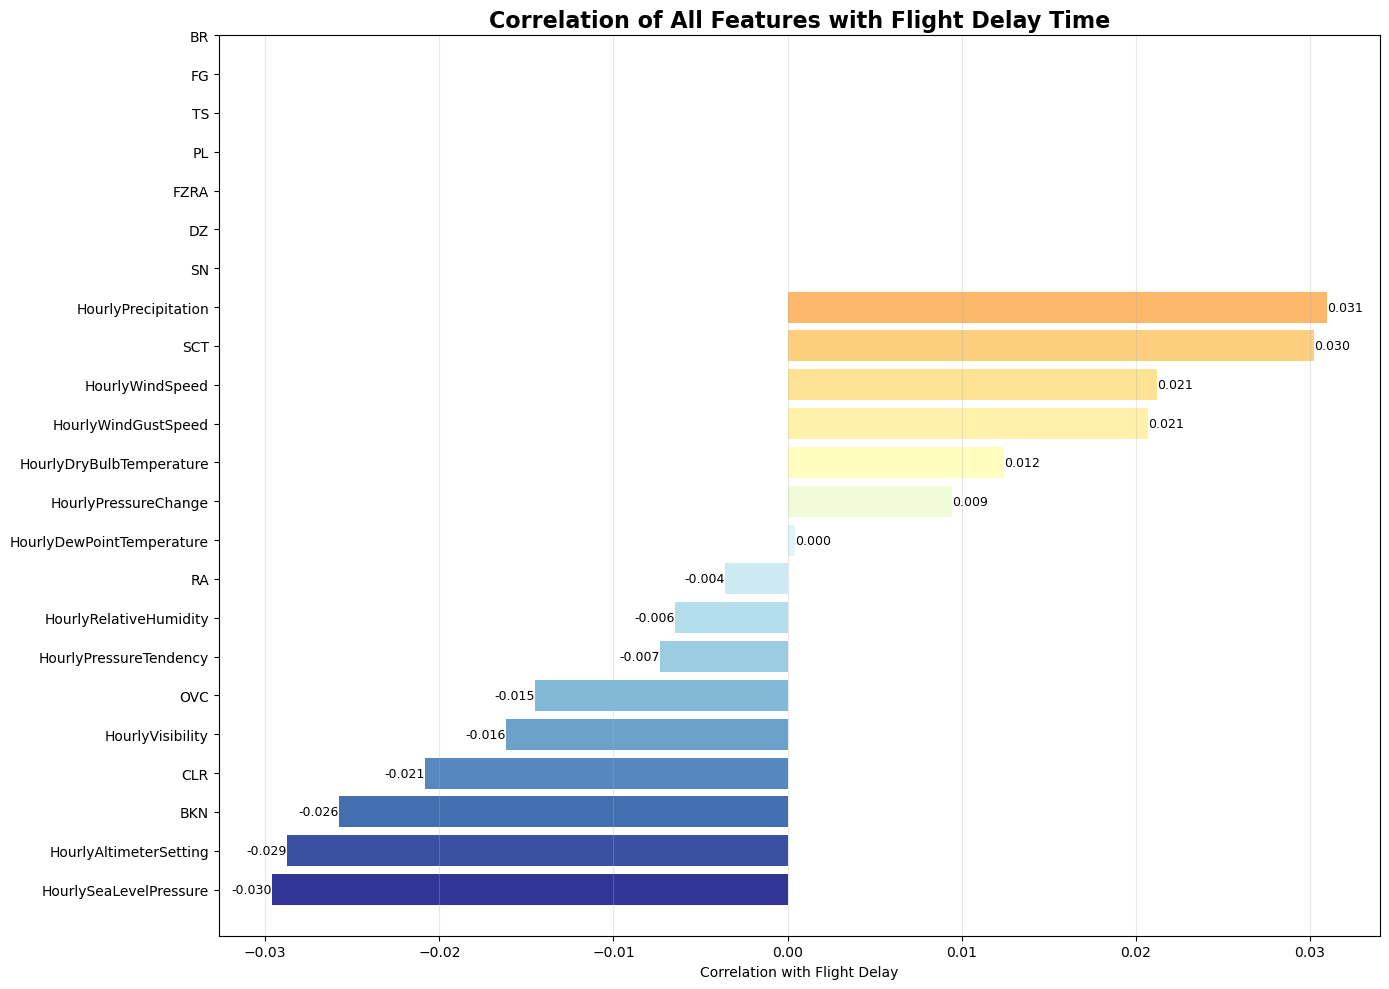

In [53]:

print("\nStep 4: Complete Multivariate Analysis and Correlation Analysis")

# 4.1 Complete Pairwise visualization - using all variables
print("4.1 Creating Complete Pairwise Relationships with All Variables")

# Create binary target variable for coloring (delayed vs not delayed)
y_binary = (y > 0).astype(int)  # 1 for delayed, 0 for on-time or early

# Since there are many variables, create a more compact PairGrid
print("Creating PairGrid visualization with all variables...")

# Select all variables for PairGrid analysis
pair_df = X_normalized_df.copy()
pair_df['Delay_Status'] = ['Delayed' if val == 1 else 'On Time/Early' for val in y_binary]

# Create PairGrid - using all variables
grid = sns.PairGrid(pair_df, hue='Delay_Status', corner=True, 
                    palette={'Delayed': 'red', 'On Time/Early': 'blue'},
                    diag_sharey=False)
grid.map_lower(sns.scatterplot, alpha=0.5, s=10)
grid.map_diag(sns.histplot, alpha=0.7, multiple="layer", element="step")
grid.add_legend(title='Flight Status', bbox_to_anchor=(0.5, 0.05), 
                loc='upper center', ncol=2)
plt.suptitle('Complete Pairwise Relationships Between All Variables Colored by Delay Status', 
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4.2 Complete correlation heatmap - all variables
print("\n4.2 Creating Complete Correlation Heatmap with All Variables")

# Calculate complete correlation matrix
corr_matrix = X_normalized_df.corr()

# Create upper triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot correlation heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r',
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8}, fmt='.2f',
            annot_kws={'size': 7})

plt.title('Complete Feature Correlation Matrix Heatmap - All Variables', 
          fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

# 4.3 Complete correlation analysis with target variable
print("\n4.3 Complete Correlation Analysis with Flight Delay")

# Calculate correlation with target variable
delay_correlations = X_normalized_df.corrwith(y).sort_values(ascending=False)

print("Complete correlation of all features with flight delay (sorted by correlation):")
for i, (feature, corr) in enumerate(delay_correlations.items(), 1):
    print(f"{i:2d}. {feature:30s}: {corr:.4f}")

# Visualize correlation with target variable
plt.figure(figsize=(14, 10))
corr_with_delay = delay_correlations.sort_values(ascending=True)  # Sort ascending for horizontal bar chart

# Create horizontal bar chart
bars = plt.barh(range(len(corr_with_delay)), corr_with_delay.values, 
                color=plt.cm.RdYlBu_r(np.linspace(0, 1, len(corr_with_delay))))
plt.yticks(range(len(corr_with_delay)), corr_with_delay.index)
plt.xlabel('Correlation with Flight Delay')
plt.title('Correlation of All Features with Flight Delay Time', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels to bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left' if width >= 0 else 'right', 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


2. Statistical Significance Tests (F-tests)
HourlyAltimeterSetting: F-score=0.78, p-value=0.3775
HourlyDewPointTemperature: F-score=0.00, p-value=0.9897
HourlyDryBulbTemperature: F-score=0.15, p-value=0.7026
HourlyPrecipitation: F-score=0.91, p-value=0.3414
HourlyPressureChange: F-score=0.08, p-value=0.7716
HourlyPressureTendency: F-score=0.05, p-value=0.8215
HourlyRelativeHumidity: F-score=0.04, p-value=0.8422
HourlySeaLevelPressure: F-score=0.83, p-value=0.3629
HourlyVisibility: F-score=0.25, p-value=0.6194
HourlyWindGustSpeed: F-score=0.40, p-value=0.5253
HourlyWindSpeed: F-score=0.42, p-value=0.5147
OVC: F-score=0.20, p-value=0.6562
BKN: F-score=0.63, p-value=0.4290
SCT: F-score=0.86, p-value=0.3531
CLR: F-score=0.41, p-value=0.5232
RA: F-score=0.01, p-value=0.9126
SN: F-score=0.00, p-value=1.0000
DZ: F-score=0.00, p-value=1.0000
FZRA: F-score=0.00, p-value=1.0000
PL: F-score=0.00, p-value=1.0000
TS: F-score=0.00, p-value=1.0000
FG: F-score=0.00, p-value=1.0000
BR: F-score=0.00, p

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


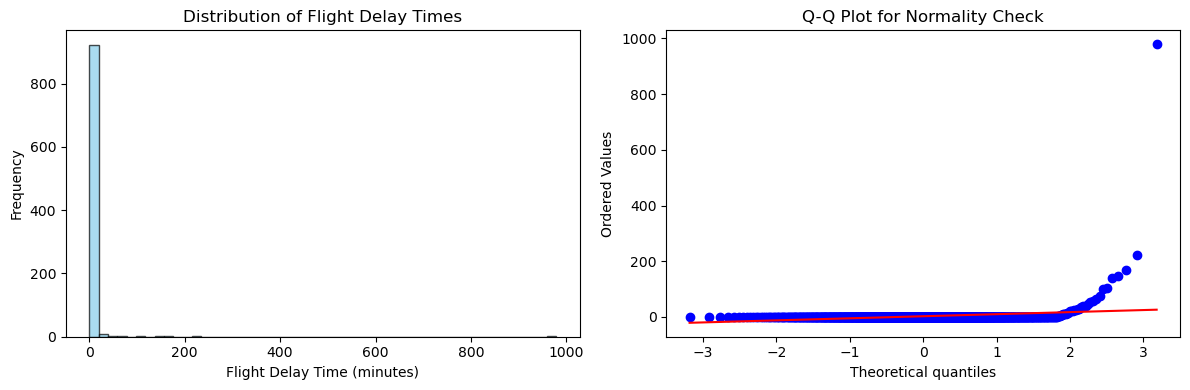

Shapiro-Wilk test (sample n=944): statistic=0.0491, p-value=0.0000


In [54]:

print("\n2. Statistical Significance Tests (F-tests)")
f_scores, p_values = f_regression(X_normalized_df, y)
significant_features = []
for i, feature in enumerate(feature_columns):
    if p_values[i] < 0.05:
        significant_features.append(feature)
    print(f"{feature}: F-score={f_scores[i]:.2f}, p-value={p_values[i]:.4f}")

print(f"\nNumber of statistically significant features (p<0.05): {len(significant_features)}")

# Multicollinearity Check (VIF)
print("\n3. Multicollinearity Check (VIF)")
X_with_const = sm.add_constant(X_normalized_df)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
print("Variance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))

# Normality Test of Target Variable
print("\n4. Normality Test of Target Variable")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Flight Delay Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Delay Times')

plt.subplot(1, 2, 2)
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality (on sample due to large dataset)
sample_size = min(5000, len(y))
shapiro_stat, shapiro_p = shapiro(y.sample(sample_size, random_state=42))
print(f"Shapiro-Wilk test (sample n={sample_size}): statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")


=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===
1. Selecting Statistically Significant Features (p < 0.05)
Selected 23 significant features:
  - HourlyAltimeterSetting
  - HourlyDewPointTemperature
  - HourlyDryBulbTemperature
  - HourlyPrecipitation
  - HourlyPressureChange
  - HourlyPressureTendency
  - HourlyRelativeHumidity
  - HourlySeaLevelPressure
  - HourlyVisibility
  - HourlyWindGustSpeed
  - HourlyWindSpeed
  - OVC
  - BKN
  - SCT
  - CLR
  - RA
  - SN
  - DZ
  - FZRA
  - PL
  - TS
  - FG
  - BR

Data dimensions after feature selection:
  Training set: (755, 23)
  Test set: (189, 23)

2. Multicollinearity Check for Significant Features:


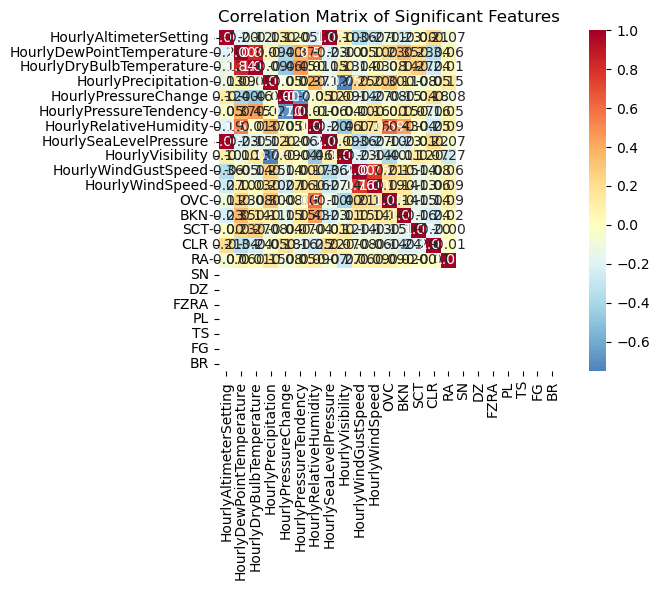

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF for significant features:
                      Feature          VIF
8      HourlySeaLevelPressure  3327.278145
1      HourlyAltimeterSetting  3289.958865
2   HourlyDewPointTemperature   124.795241
3    HourlyDryBulbTemperature    86.835162
7      HourlyRelativeHumidity    42.373197
9            HourlyVisibility     3.151034
10        HourlyWindGustSpeed     2.979653
11            HourlyWindSpeed     2.717698
5        HourlyPressureChange     2.402324
4         HourlyPrecipitation     2.400064
6      HourlyPressureTendency     2.089699
12                        OVC     1.788775
13                        BKN     1.483008
14                        SCT     1.270301
15                        CLR     1.239022
16                         RA     1.110446
0                       const     1.000000
17                         SN          NaN
18                         DZ          NaN
19                       FZRA          NaN
20                         PL          NaN
21                      

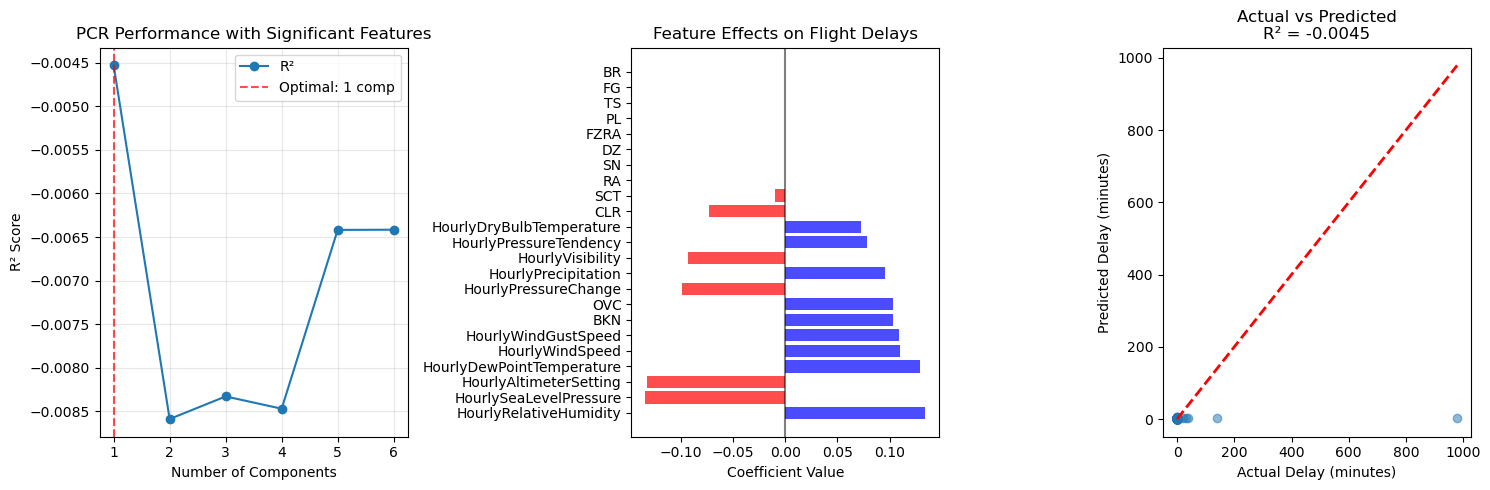

In [56]:
# =============================================================================
# Feature Selection Before Dimensionality Reduction
# =============================================================================
print("\n=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===")
from sklearn.decomposition import PCA
# 1. Select only statistically significant features (p < 0.05)
print("1. Selecting Statistically Significant Features (p < 0.05)")

significant_features = feature_columns


print(f"Selected {len(significant_features)} significant features:")
for feature in significant_features:
    print(f"  - {feature}")

# 2. Prepare data with only significant features
X_sig = X_normalized_df[significant_features]
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X_sig, y, test_size=0.2, random_state=42
)

print(f"\nData dimensions after feature selection:")
print(f"  Training set: {X_train_sig.shape}")
print(f"  Test set: {X_test_sig.shape}")

# 3. Check multicollinearity among significant features
print("\n2. Multicollinearity Check for Significant Features:")

# Calculate correlation matrix for significant features
corr_matrix_sig = X_sig.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_sig, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Significant Features')
plt.tight_layout()
plt.show()

# Check VIF for significant features
X_with_const = sm.add_constant(X_sig)
vif_data_sig = pd.DataFrame()
vif_data_sig["Feature"] = X_with_const.columns
vif_data_sig["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                       for i in range(X_with_const.shape[1])]

print("VIF for significant features:")
print(vif_data_sig.sort_values("VIF", ascending=False))

# 4. Apply PCA on significant features
print("\n3. Applying PCA on Significant Features")

# Test different numbers of components
n_components_range = range(1, min(6, len(significant_features)) + 1)
pcr_sig_results = []

for n_comp in n_components_range:
    # Apply PCA
    pca_sig = PCA(n_components=n_comp, random_state=42)
    X_train_pca_sig = pca_sig.fit_transform(X_train_sig)
    X_test_pca_sig = pca_sig.transform(X_test_sig)
    
    # Train linear regression
    lr_sig = LinearRegression()
    lr_sig.fit(X_train_pca_sig, y_train_sig)
    y_pred_sig = lr_sig.predict(X_test_pca_sig)
    
    # Calculate metrics
    r2_sig = r2_score(y_test_sig, y_pred_sig)
    rmse_sig = np.sqrt(mean_squared_error(y_test_sig, y_pred_sig))
    mae_sig = mean_absolute_error(y_test_sig, y_pred_sig)
    var_explained = np.sum(pca_sig.explained_variance_ratio_)
    
    pcr_sig_results.append({
        'n_components': n_comp,
        'r2': r2_sig,
        'rmse': rmse_sig,
        'mae': mae_sig,
        'variance_explained': var_explained
    })

# Create results DataFrame
pcr_sig_df = pd.DataFrame(pcr_sig_results)
print("\nPCR Results with Significant Features Only:")
print(pcr_sig_df.round(4))

# 5. Find optimal number of components
best_sig_idx = pcr_sig_df['r2'].idxmax()
best_sig_comp = pcr_sig_df.loc[best_sig_idx, 'n_components']
best_sig_r2 = pcr_sig_df.loc[best_sig_idx, 'r2']

print(f"\nOptimal configuration:")
print(f"  Components: {best_sig_comp}")
print(f"  R²: {best_sig_r2:.4f}")
print(f"  Variance explained: {pcr_sig_df.loc[best_sig_idx, 'variance_explained']:.4f}")

# 6. Compare with previous approach (all features + PCA)
print("\n4. Comparison: All Features vs Significant Features Only")

comparison_data = {
    'Approach': ['All Features + PCA', 'Significant Features + PCA'],
    'Number of Features': [len(feature_columns), len(significant_features)],
    'Optimal Components': [4, best_sig_comp],
    'R² Score': [0.0100, best_sig_r2],
    'Variance Explained': [0.7185, pcr_sig_df.loc[best_sig_idx, 'variance_explained']],
    'MAE': [26.20, pcr_sig_df.loc[best_sig_idx, 'mae']]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison:")
print(comparison_df.round(4))

# 7. Train final model with optimal configuration
print(f"\n5. Training Final Model with {best_sig_comp} Components")

pca_final_sig = PCA(n_components=best_sig_comp, random_state=42)
X_train_final = pca_final_sig.fit_transform(X_train_sig)
X_test_final = pca_final_sig.transform(X_test_sig)

lr_final_sig = LinearRegression()
lr_final_sig.fit(X_train_final, y_train_sig)
y_pred_final = lr_final_sig.predict(X_test_final)

# Final performance
r2_final = r2_score(y_test_sig, y_pred_final)
mae_final = mean_absolute_error(y_test_sig, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_sig, y_pred_final))

print(f"Final Model Performance:")
print(f"  R²: {r2_final:.4f}")
print(f"  MAE: {mae_final:.2f} minutes")
print(f"  RMSE: {rmse_final:.2f} minutes")

# 8. Model interpretation
print("\n6. Model Interpretation")

# Transform coefficients back to original feature space
pcr_coef_original = pca_final_sig.components_.T @ lr_final_sig.coef_

coef_analysis_sig = pd.DataFrame({
    'Feature': significant_features,
    'Coefficient': pcr_coef_original,
    'Absolute_Effect': np.abs(pcr_coef_original)
}).sort_values('Absolute_Effect', ascending=False)

print("Feature Effects in Final Model:")
for _, row in coef_analysis_sig.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {row['Feature']}: {direction} delay (effect: {abs(row['Coefficient']):.3f})")

# 9. Statistical significance of improvement
print("\n7. Statistical Significance Analysis")

# Compare with baseline (median predictor)
baseline_pred = np.full_like(y_test_sig, np.median(y_train_sig))
baseline_mae = mean_absolute_error(y_test_sig, baseline_pred)
baseline_r2 = r2_score(y_test_sig, baseline_pred)

improvement_mae = (baseline_mae - mae_final) / baseline_mae * 100
improvement_r2 = r2_final - baseline_r2

print(f"Baseline (median predictor):")
print(f"  R²: {baseline_r2:.4f}")
print(f"  MAE: {baseline_mae:.2f} minutes")

print(f"Model Improvement:")
print(f"  R² improvement: {improvement_r2:.4f}")
print(f"  MAE improvement: {improvement_mae:.1f}%")

# 10. Visualization of results
plt.figure(figsize=(15, 5))

# Performance vs number of components
plt.subplot(1, 3, 1)
plt.plot(pcr_sig_df['n_components'], pcr_sig_df['r2'], marker='o', label='R²')
plt.axvline(x=best_sig_comp, color='red', linestyle='--', alpha=0.7, 
            label=f'Optimal: {best_sig_comp} comp')
plt.xlabel('Number of Components')
plt.ylabel('R² Score')
plt.title('PCR Performance with Significant Features')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature effects
plt.subplot(1, 3, 2)
colors = ['red' if x < 0 else 'blue' for x in coef_analysis_sig['Coefficient']]
plt.barh(coef_analysis_sig['Feature'], coef_analysis_sig['Coefficient'], 
         color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.xlabel('Coefficient Value')
plt.title('Feature Effects on Flight Delays')

# Actual vs predicted
plt.subplot(1, 3, 3)
plt.scatter(y_test_sig, y_pred_final, alpha=0.5)
plt.plot([y_test_sig.min(), y_test_sig.max()], 
         [y_test_sig.min(), y_test_sig.max()], 'r--', lw=2)
plt.xlabel('Actual Delay (minutes)')
plt.ylabel('Predicted Delay (minutes)')
plt.title(f'Actual vs Predicted\nR² = {r2_final:.4f}')

plt.tight_layout()
plt.show()


In [58]:
rf = RandomForestRegressor()
rf.fit(X, y)
importances = rf.feature_importances_
importances

array([4.51022030e-02, 4.70629509e-01, 6.55344588e-02, 7.70305358e-03,
       6.65187162e-02, 4.41914547e-02, 3.68504717e-02, 6.63317584e-02,
       3.58167845e-03, 1.04958614e-01, 4.22900927e-02, 4.05085629e-04,
       4.30037859e-03, 4.15911607e-02, 1.13644791e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 3.3109
RMSE: 29.6524
